In [127]:
## Importing Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
##Validation Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 7558 files belonging to 38 classes.


In [106]:
##Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 30470 files belonging to 38 classes.


In [107]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [108]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [109]:
for (x,y) in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[134.   132.   135.  ]
   [130.   128.   131.  ]
   [128.25 126.25 129.25]
   ...
   [117.75 115.75 118.75]
   [115.   113.   116.  ]
   [129.   127.   130.  ]]

  [[123.75 121.75 124.75]
   [133.25 131.25 134.25]
   [134.75 132.75 135.75]
   ...
   [123.   121.   124.  ]
   [105.5  103.5  106.5 ]
   [107.   105.   108.  ]]

  [[130.25 128.25 131.25]
   [131.75 129.75 132.75]
   [133.25 131.25 134.25]
   ...
   [133.5  131.5  134.5 ]
   [107.25 105.25 108.25]
   [116.75 114.75 117.75]]

  ...

  [[ 59.5   59.5   61.5 ]
   [ 62.75  62.75  64.75]
   [ 65.5   65.5   67.5 ]
   ...
   [ 91.75  89.75  92.75]
   [ 87.75  85.75  88.75]
   [ 90.25  88.25  91.25]]

  [[ 60.75  60.75  62.75]
   [ 60.75  60.75  62.75]
   [ 60.    60.    62.  ]
   ...
   [ 88.25  86.25  89.25]
   [ 85.5   83.5   86.5 ]
   [ 88.    86.    89.  ]]

  [[ 63.    63.    65.  ]
   [ 67.    67.    69.  ]
   [ 60.25  60.25  62.25]
   ...
   [ 91.5   89.5   92.5 ]
   [ 87.25  85.25  88.25]
   [ 89.5   87.5   9

In [110]:
##Building Model

from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential


In [111]:
model = Sequential()

In [112]:
##Building Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Victus\OneDrive\Desktop\Plant_Disease_Prediction\New Plant Diseases Dataset(Augmented)\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [113]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [114]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [115]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [116]:
model.add(Flatten())

In [117]:
model.add(Dense(units=1024,activation='relu'))

In [118]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [119]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [120]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
##Model Training 

In [122]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


953/953 ━━━━━━━━━━━━━━━━━━━━ 564s 589ms/step - accuracy: 0.4605 - loss: 2.0389 - val_accuracy: 0.7792 - val_loss: 0.6804
Epoch 2/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 543s 570ms/step - accuracy: 0.8512 - loss: 0.4681 - val_accuracy: 0.8759 - val_loss: 0.3947
Epoch 3/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 546s 573ms/step - accuracy: 0.9132 - loss: 0.2718 - val_accuracy: 0.9106 - val_loss: 0.2670
Epoch 4/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 544s 571ms/step - accuracy: 0.9373 - loss: 0.1885 - val_accuracy: 0.9080 - val_loss: 0.2988
Epoch 5/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 548s 575ms/step - accuracy: 0.9474 - loss: 0.1563 - val_accuracy: 0.8894 - val_loss: 0.4251
Epoch 6/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 549s 576ms/step - accuracy: 0.9425 - loss: 0.1859 - val_accuracy: 0.9213 - val_loss: 0.3076
Epoch 7/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 553s 580ms/step - accuracy: 0.9606 - loss: 0.1286 - val_accuracy: 0.8932 - val_loss: 0.3917
Epoch 8/10
953/953 ━━━━━━━━━━━━━━━━━━━━ 552s 579ms/step - accuracy: 0.9649 - loss: 0.10

In [123]:
##Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

953/953 ━━━━━━━━━━━━━━━━━━━━ 145s 151ms/step - accuracy: 0.9545 - loss: 0.1545


In [124]:
print(train_loss,train_acc)

0.14104558527469635 0.9569740891456604


In [126]:
##Model Evaluation on Training Set
val_loss,val_acc = model.evaluate(validation_set)

237/237 ━━━━━━━━━━━━━━━━━━━━ 39s 160ms/step - accuracy: 0.8969 - loss: 0.4623


In [23]:
print(val_loss,val_acc)

0.34809422492980957 0.9259063005447388


In [25]:
#Saving Model
model.save('trained_model.keras')

In [26]:
training_history.history

{'accuracy': [0.5577288866043091,
  0.8415490388870239,
  0.8984246850013733,
  0.9314407706260681,
  0.9451263546943665,
  0.9515588879585266,
  0.9598293304443359,
  0.9682967066764832,
  0.9716770648956299,
  0.9700360894203186],
 'loss': [1.5139009952545166,
  0.49800974130630493,
  0.30354249477386475,
  0.20649942755699158,
  0.16092218458652496,
  0.1475009322166443,
  0.11711280047893524,
  0.10018296539783478,
  0.0910935327410698,
  0.09383751451969147],
 'val_accuracy': [0.6541413068771362,
  0.8428155779838562,
  0.8850225210189819,
  0.8944165110588074,
  0.8862133026123047,
  0.9244509339332581,
  0.9228631854057312,
  0.9133368730545044,
  0.920216977596283,
  0.9001058340072632],
 'val_loss': [1.0852378606796265,
  0.4797283709049225,
  0.3657085597515106,
  0.34965428709983826,
  0.39944934844970703,
  0.26816922426223755,
  0.31698814034461975,
  0.3302130401134491,
  0.3449302911758423,
  0.40554797649383545]}

In [27]:
 #Recording History for future use
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

Accuracy Visualization



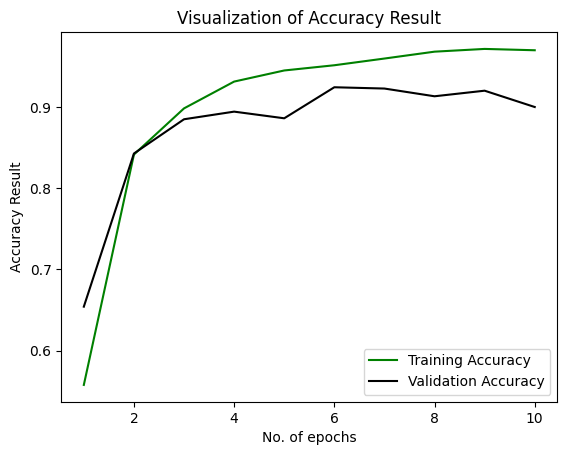

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'green',label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'black',label = 'Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some metrics for model evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
len(class_name)

38

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 7558 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

237/237 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step


(array([[9.99998689e-01, 9.90789658e-07, 1.51729570e-23, ...,
         1.89610165e-22, 2.13381964e-24, 1.75300807e-19],
        [9.98434484e-01, 8.74759110e-08, 2.97012984e-14, ...,
         4.48334051e-13, 4.28457427e-13, 1.84764530e-11],
        [9.99938369e-01, 2.43562215e-09, 2.52763034e-14, ...,
         1.73969691e-14, 2.80178916e-14, 1.78566970e-11],
        ...,
        [6.49695994e-06, 2.04866746e-09, 3.97525179e-10, ...,
         1.84834048e-09, 2.51918331e-09, 2.21835554e-01],
        [2.50323734e-10, 1.04892095e-13, 2.90495031e-16, ...,
         3.60205340e-16, 9.30037941e-16, 9.53943610e-01],
        [1.67766882e-15, 1.07948430e-15, 1.01676007e-19, ...,
         1.74441612e-19, 9.76597090e-20, 9.99998689e-01]], dtype=float32),
 (7558, 38))

In [33]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(7558,), dtype=int64, numpy=array([ 0,  0,  0, ...,  3, 37, 37], dtype=int64)>

In [34]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(7558, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(7558,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(Y_true,predicted_categories))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       262
           1       0.94      0.96      0.95       356
           3       0.84      0.87      0.86       502
           4       0.91      0.94      0.93       382
           8       0.99      1.00      1.00       477
          10       0.95      0.98      0.96       111
          11       0.99      1.00      0.99       472
          14       0.96      0.97      0.96       336
          16       0.75      0.84      0.79       200
          17       0.94      0.94      0.94       286
          19       0.78      0.97      0.86       311
          20       0.90      0.90      0.90       210
          21       0.88      0.88      0.88       485
          22       0.76      0.81      0.78       262
          23       0.95      0.86      0.90       293
          24       0.95      0.89      0.92       505
          25       0.99      0.89      0.94       360
          27       0.95    

In [38]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[232,   2,   9,   1,   1,   0,   1,   0,   6,   0,   2,   1,   0,
          0,   0,   1,   0,   2,   1,   0,   1,   1,   1],
       [  4, 342,   2,   0,   0,   0,   1,   2,   0,   0,   0,   0,   1,
          3,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [ 12,   0, 439,   5,   0,   0,   0,   3,   1,   9,   5,   0,   0,
         15,   0,   7,   0,   0,   0,   1,   0,   2,   3],
       [  7,   0,   3, 358,   0,   0,   0,   0,   0,   0,   1,   0,   2,
          4,   0,   0,   0,   7,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 477,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1, 109,   0,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 470,   1,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,   0,   0,   0,   0,   0, 325,   1,   0,   0,   0,   2,
   

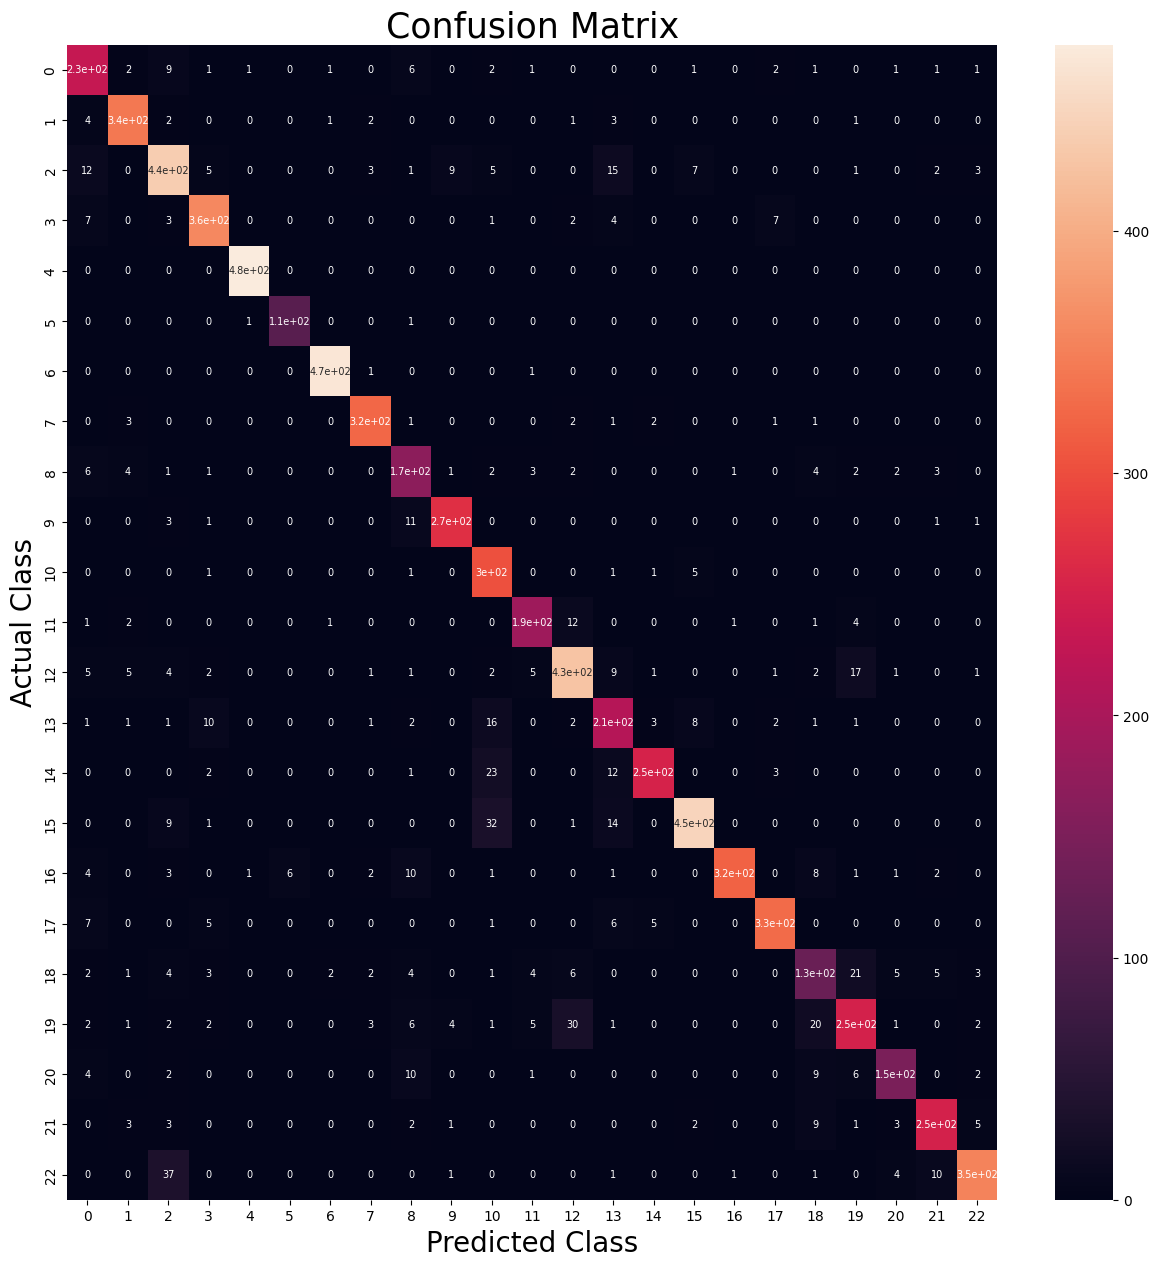

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={'size':7})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Confusion Matrix",fontsize=25)
plt.show()